# Telecom Churn Prediction

Churn is a one of the biggest problems in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is just mere 1.9% - 2%. 

### About the dataset,

Reference: <strong><a href='https://www.kaggle.com/blastchar/telco-customer-churn'>Telco Customer Churn</a></strong>

## Context

`"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]`

## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'  # Graphics in SVG format are more sharp and legible

Let's load the dataset into a dataframe, 

In [33]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=False)
df.head(8).T

,0,1,2,3,4,5,6,7
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes


In [34]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Looks like we don't need the `customerID` column, and the data in other columns needs to be converted into categorical type in order to make any predictions,

In [4]:
df.drop('customerID', axis=1, inplace=True)
df.head(8).T

,0,1,2,3,4,5,6,7
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No


In [5]:
new_df = df.iloc[:, :-3]

df_cat = pd.get_dummies(new_df)
df_cat.head(7).T

,0,1,2,3,4,5,6
SeniorCitizen,0,0,0,0,0,0,0
tenure,1,34,2,45,2,8,22
gender_Female,1,0,0,0,1,1,0
gender_Male,0,1,1,1,0,0,1
Partner_No,0,1,1,1,1,1,1
Partner_Yes,1,0,0,0,0,0,0
Dependents_No,1,1,1,1,1,1,0
Dependents_Yes,0,0,0,0,0,0,1
PhoneService_No,1,0,0,1,0,0,0
PhoneService_Yes,0,1,1,0,1,1,1


In [6]:
temp = df_cat['tenure'] 
df_cat.drop('tenure', axis=1, inplace=True)

df_cat['tenure'] = temp
df_cat['TotalCharges'] = df['TotalCharges']
df_cat['Churn'] = df['Churn']

df_cat.replace(to_replace='Yes', value=1, inplace=True)
df_cat.replace(to_replace='No', value=0, inplace=True)


In [7]:
df_cat.head(5).T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
gender_Female,1,0,0,0,1
gender_Male,0,1,1,1,0
Partner_No,0,1,1,1,1
Partner_Yes,1,0,0,0,0
Dependents_No,1,1,1,1,1
Dependents_Yes,0,0,0,0,0
PhoneService_No,1,0,0,1,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No,0,1,1,0,1


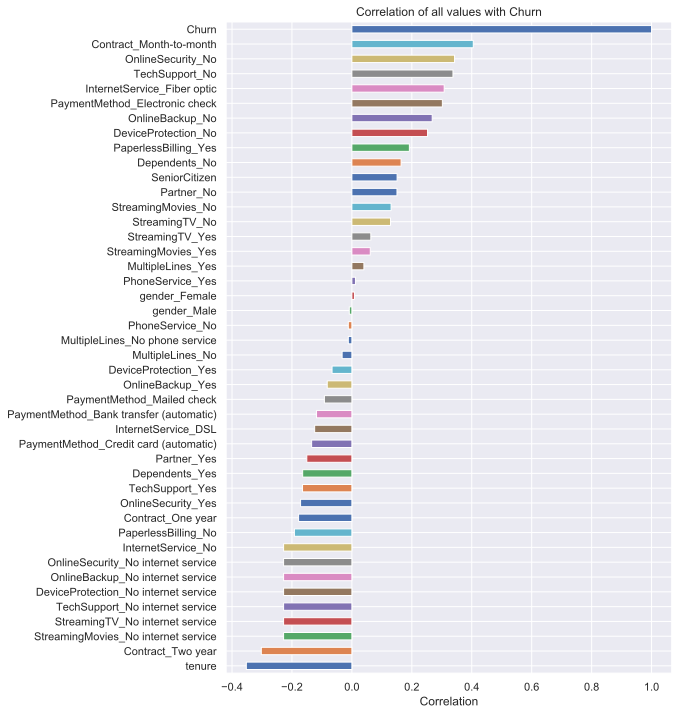

In [8]:
plt.figure(figsize=(8, 12))
df_cat.corr()['Churn'].sort_values().plot(kind='barh')
plt.title('Correlation of all values with Churn')
plt.xlabel('Correlation')
plt.show()
plt.close()

From this, we can say that Month to month contracts, no online security, no online backup, no tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Surprisingly, Online security, streaming , online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations before we start building the model and identifying the important variables. 

First we will try to understand distributions depending on age, gender, dependents, and partner status

In [9]:
df['gender'].value_counts() / len(df)  * 100  # Distribution of gender

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

In [10]:
df['SeniorCitizen'].value_counts() / len(df)  * 100  # Percentage of SeniorCitizen

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

So there are only about 16 % senior citizens customers

In [11]:
df['Partner'].value_counts() / len(df)  * 100  # Percentage of people having Partners

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [12]:
df['Dependents'].value_counts() / len(df)  * 100  # Percentage of people having Dependents

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

About 48 % of the customers have a partners, and nearly 30 % of the total customers have dependents. 

Let's see how many customers who have partners also have depenedents, 

In [13]:
dependet_partners = df.groupby(['Partner', 'Dependents']).size().unstack()
dependet_partners *100 / dependet_partners.T.sum()

Dependents,No,Yes
Partner,,
No,90.085141,10.611405
Yes,45.399615,51.410935


From this, 51 % customers who have partners also have dependents.

Now, we will try to understand the customer's account information like tenure and contrat details,

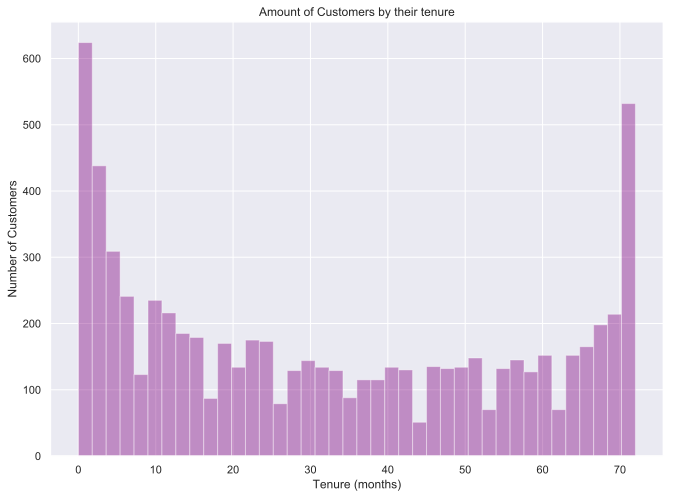

In [14]:
plt.figure(figsize=(11, 8))
sns.distplot(df['tenure'],
             hist=True,
             bins=120//3,
             kde=False,
             color = 'purple')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)')
plt.title('Amount of Customers by their tenure')
plt.show()
plt.close()

From this histogram we can say, a lot of customers have been with the telecom company for just a month, and a many are there for nearly about 70 months. 

This might be because of the different customers having different type of contracts. 

So, based on the contract it is more/less easier for the customers to stay/leave the telecom company.

Now, to understand this distribution from above histogram more clearly, let's look at the customers with different contract types,

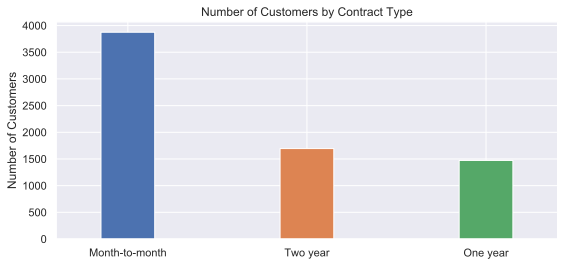

In [15]:
plt.figure(figsize=(9, 4))
df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Contract Type')
plt.show()
plt.close()

Text(0.5,1,'One year Contract')

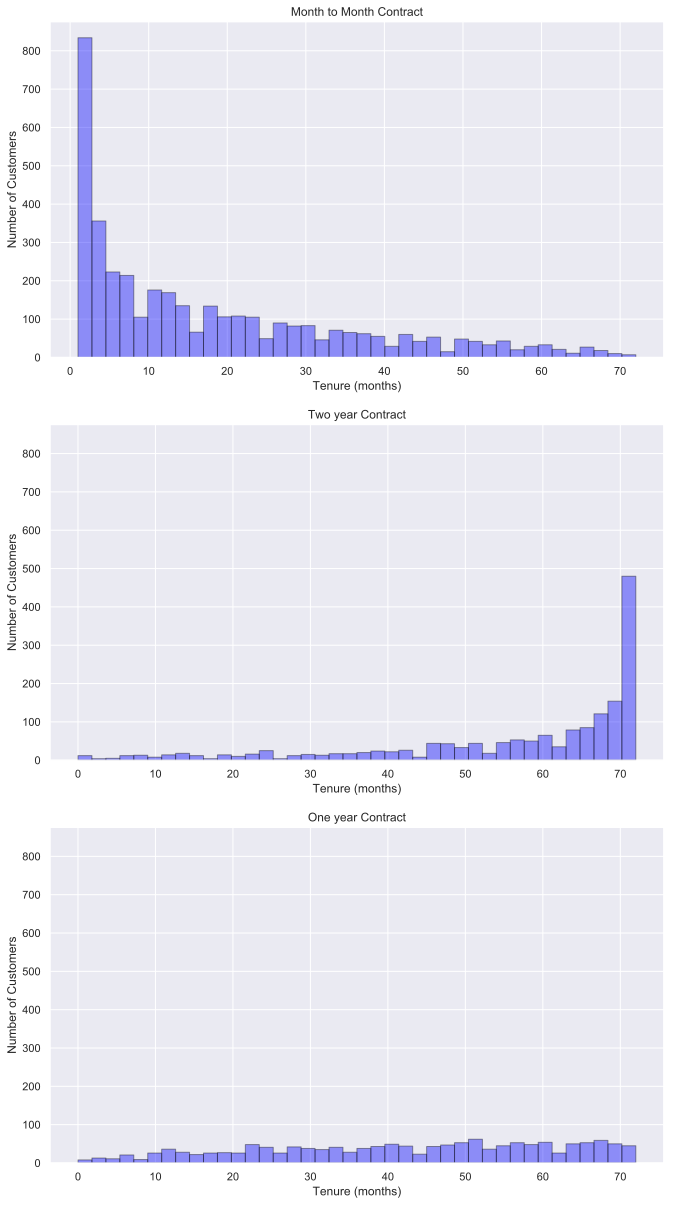

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(11, 21))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two year Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One year Contract')

Clearly, most of the monthly contracts last for just 1-2 months, and the 2 year contracts tend to last longer for about 70 months. 

This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.


Now, let's take a look at our prediction variable `Churn`, and understand the churn rate and it's interaction with other variables,

In [17]:
df['Churn'].value_counts()*100.0 / len(df)  # Percentage of customers reataining with the company

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

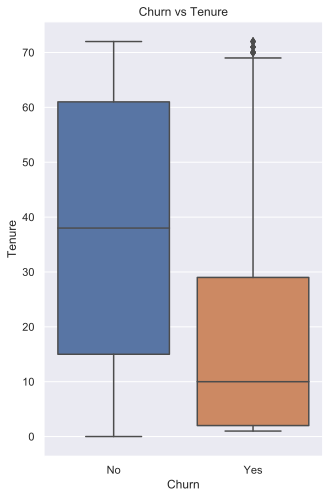

In [18]:
plt.figure(figsize=(5, 8))
sns.boxplot(x = df.Churn, y = df.tenure)
plt.ylabel('Tenure')
plt.title('Churn vs Tenure')
plt.show()
plt.close()

In [19]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
contract_churn.T*100.0 / contract_churn.T.sum()

Contract,Month-to-month,One year,Two year
Churn,,,
No,57.290323,88.730482,97.168142
Yes,42.709677,11.269518,2.831858


This clearly shows, the customers with lower tenure tend to churn more and vice versa.

Let's look at Churn rate for senior citizens, monthly and total charges,

In [20]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()
seniority_churn.T*100.0 / seniority_churn.T.sum()

SeniorCitizen,0,1
Churn,,
No,76.393832,58.318739
Yes,23.606168,41.681261


C:\Users\OU5047914\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of monthly charges by churn')

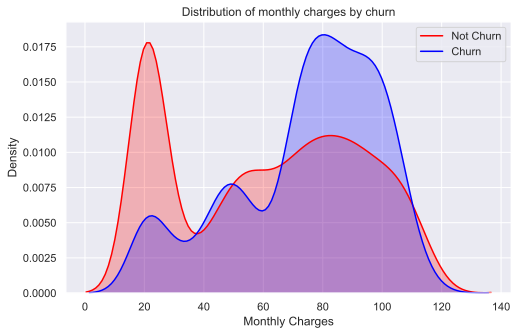

In [21]:
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

It seems that, senior citizen tend to churn more than young customers.

Also as the monthly charges increase, customers are more likely to churn,

Now let's build few predictive models and compare them to find the best one.

The task here will be to classify whether or not the customer will churn,  so we will have to scale our input values between 0 and 1

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [24]:
y = df_cat['Churn'].values
X = df_cat.drop(columns = ['Churn'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: could not convert string to float: 

In [25]:
df_cat.dtypes

SeniorCitizen                               int64
gender_Female                               int64
gender_Male                                 int64
Partner_No                                  int64
Partner_Yes                                 int64
Dependents_No                               int64
Dependents_Yes                              int64
PhoneService_No                             int64
PhoneService_Yes                            int64
MultipleLines_No                            int64
MultipleLines_No phone service              int64
MultipleLines_Yes                           int64
InternetService_DSL                         int64
InternetService_Fiber optic                 int64
InternetService_No                          int64
OnlineSecurity_No                           int64
OnlineSecurity_No internet service          int64
OnlineSecurity_Yes                          int64
OnlineBackup_No                             int64
OnlineBackup_No internet service            int64
